In [46]:
! pip install scikit-image


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [47]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import color
from skimage import io
from sklearn.decomposition import NMF

In [48]:
image = io.imread("photo11.jpg")

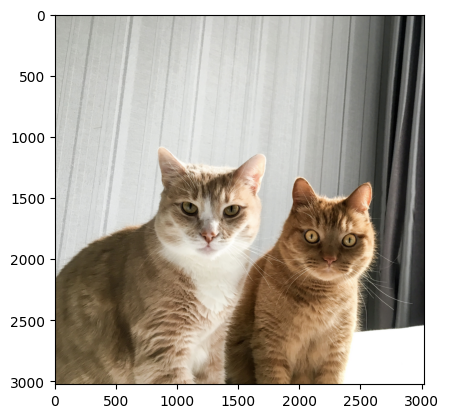

In [49]:
plt.imshow(image)

In [50]:
gray_image = color.rgb2gray(image)
gray_image

array([[0.67141451, 0.67925765, 0.67730824, ..., 0.41823176, 0.40982314,
        0.41374471],
       [0.68317922, 0.68317922, 0.67730824, ..., 0.4260749 , 0.42550941,
        0.43335255],
       [0.69102235, 0.68317922, 0.67730824, ..., 0.43783961, 0.43727412,
        0.44119569],
       ...,
       [0.3944851 , 0.38664196, 0.37879882, ..., 1.        , 1.        ,
        1.        ],
       [0.38664196, 0.38272039, 0.37095569, ..., 1.        , 1.        ,
        1.        ],
       [0.38664196, 0.40232824, 0.38664196, ..., 1.        , 1.        ,
        1.        ]])

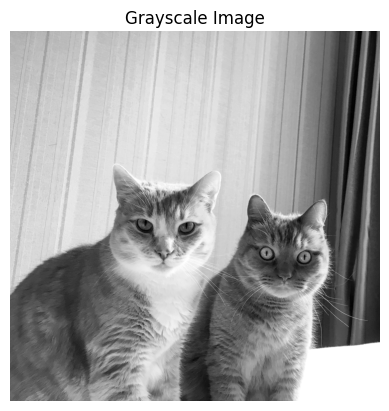

In [51]:
plt.imshow(gray_image, cmap="gray")
plt.title("Grayscale Image")
plt.axis("off")
plt.show()

In [52]:
h, w = gray_image.shape
gray_image_flattened = gray_image.reshape(h, w)

In [59]:
k = 100
nmf_model = NMF(n_components=k, init="random", random_state=42)
W = nmf_model.fit_transform(gray_image_flattened)
H = nmf_model.components_

c:\Users\yulic\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


In [60]:
# Reconstract the image using the two matrices W and H
low_rank_image = np.dot(W, H).reshape(h, w)

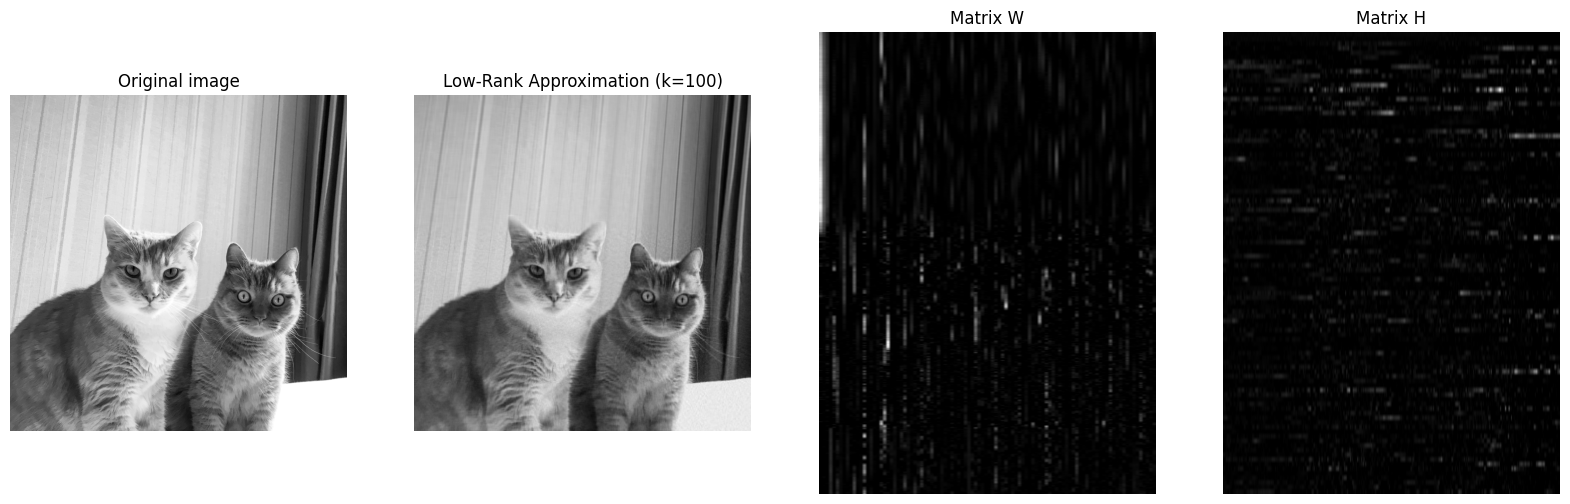

In [61]:
# Plot the original, low-rank approximation and the two matrices
fig, ax = plt.subplots(1, 4, figsize=(20, 6))

ax[0].imshow(gray_image, cmap="gray")
ax[0].set_title("Original image")
ax[0].axis("off")

ax[1].imshow(low_rank_image, cmap="gray")
ax[1].set_title(f"Low-Rank Approximation (k={k})")
ax[1].axis("off")

ax[2].imshow(W, aspect="auto", cmap="gray")
ax[2].set_title("Matrix W")
ax[2].axis("off")

ax[3].imshow(H, aspect="auto", cmap="gray")
ax[3].set_title("Matrix H")
ax[3].axis("off")

plt.show()